### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [107]:
data = pd.read_csv('data/coupons.csv')

In [108]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [110]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [111]:
data['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [112]:
data['CoffeeHouse'].unique()


array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [113]:
data[data['CoffeeHouse'].isnull()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
495,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
497,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
498,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
499,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...
Dropping the car column since it doesn't seem like any of the data is useful. The options between a scooter, crossover, mazda, do not drive, null, and a car without onstar are very vague.
Also dropping the rows where the places are null since it's hard for us to tell what the person means by that or if they are more or less likely to go to a bar. For determining if one would use a coupon, this data being missing would be problematic for our analysis.
 

In [114]:
df = data.dropna(subset=['CarryAway', 'CoffeeHouse', 'Bar', 'RestaurantLessThan20', 'Restaurant20To50', 'CarryAway', 'CoffeeHouse', 'Bar', 'RestaurantLessThan20', 'Restaurant20To50'])
df = df.drop(columns=['car'])
df['coupon'] = df['coupon'].replace({'Carry out & Take away': 'Carry Away'})
df = df.rename(columns={'passanger': 'passenger'})
df['age'] = df['age'].replace('below21', '20')
df['age'] = df['age'].replace('50plus', '51')
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int64 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon? 
### NOTE: below21 is now 20 and 50plus is now 51. This allows the column to be an integer type.



In [115]:
print(df[df['Y'] == 1].size / df.size)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

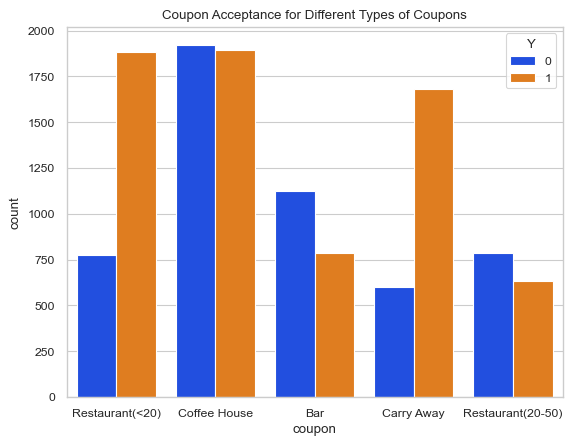

In [116]:
sns.countplot(df, x="coupon", hue="Y", palette='bright', alpha = 1).set_title('Coupon Acceptance for Different Types of Coupons')
plt.savefig('images/coupon_bar.png')

6. Use a histogram to visualize the temperature column.

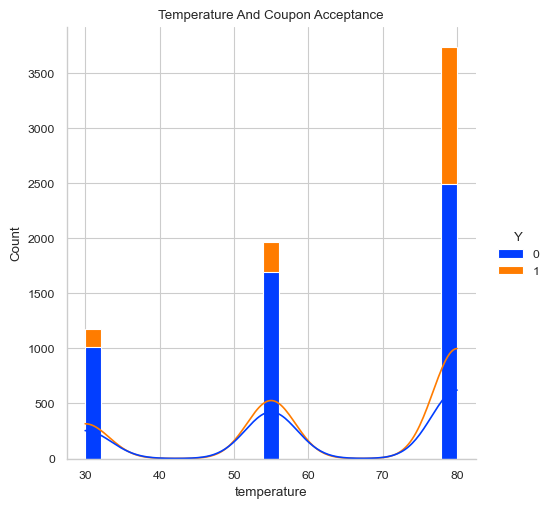

In [117]:
sns.displot(df, x='temperature', hue='Y', kde=True, palette='bright', alpha = 1).set(title='Temperature And Coupon Acceptance')
plt.savefig('images/temperature_hist.png')

In [118]:
df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry Away',
       'Restaurant(20-50)'], dtype=object)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [119]:
df_bar = df[df['coupon'] == 'Bar']
df_bar

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [120]:
df_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [121]:
df_bar['age'].unique()

array([21, 46, 26, 31, 41, 51, 36, 20])

In [122]:
df_bar['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [123]:
df_bar['passenger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [124]:
df_bar['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

2. What proportion of bar coupons were accepted?


In [125]:
print("Bar coupons overall acceptance rate: ", df_bar[df_bar['Y'] == 1].size / df_bar.size)

Bar coupons overall acceptance rate:  0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [126]:
bar_3_or_less = ['never', 'less1', '1~3']
df_bar_3_or_less = df_bar.query('Bar in @bar_3_or_less')
df_bar_more_than_3 = df_bar.query('Bar not in @bar_3_or_less')
print("Bar coupons acceptance rate for those who visit the bar 3 or less times a month: ", df_bar_3_or_less[df_bar_3_or_less['Y'] == 1].size / df_bar_3_or_less.size)
print("Bar coupons acceptance rate for those who visit the bar 4 or more times a month: ", df_bar_more_than_3[df_bar_more_than_3['Y'] == 1].size / df_bar_more_than_3.size)

Bar coupons acceptance rate for those who visit the bar 3 or less times a month:  0.37267441860465117
Bar coupons acceptance rate for those who visit the bar 4 or more times a month:  0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [127]:
bar_more_than_1 = ['1~3', '4~8', 'gt8']
df_bar_more_than_1 = df_bar.query('Bar in @bar_more_than_1 and age >= 26')
print("Bar coupons acceptance rate for those who visit the bar more than once a month and are over 25: ", df_bar_more_than_1[df_bar_more_than_1['Y'] == 1].size / df_bar_more_than_1.size)
df_bar_not_more_than_1 = df_bar.query('Bar not in @bar_more_than_1 or age < 26')
print("Bar coupons acceptance rate for those who visit the bar less and 1 times a month or are 25 or younger: ", df_bar_not_more_than_1[df_bar_not_more_than_1['Y'] == 1].size / df_bar_not_more_than_1.size)

Bar coupons acceptance rate for those who visit the bar more than once a month and are over 25:  0.6898263027295285
Bar coupons acceptance rate for those who visit the bar less and 1 times a month or are 25 or younger:  0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Bar coupons acceptance rate for those who visit the bar more than once a month and do not have a child passenger and do not have an occupation in farming, fishing, or forestry:  0.7094339622641509
Bar coupons acceptance rate for those who visit the bar more than once a month and have a child passenger  0.38095238095238093


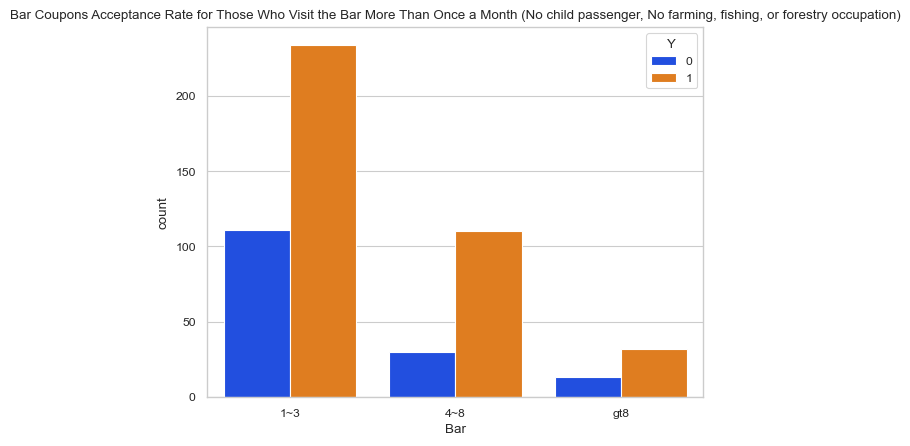

In [128]:
passenger_kid = ['Kid(s)']
occupation_farming = ['Farming Fishing & Forestry']
df_bar_not_kid_and_not_farming = df_bar.query('Bar in @bar_more_than_1 and passenger not in @passenger_kid and occupation not in @occupation_farming')
print("Bar coupons acceptance rate for those who visit the bar more than once a month and do not have a child passenger and do not have an occupation in farming, fishing, or forestry: ", df_bar_not_kid_and_not_farming[df_bar_not_kid_and_not_farming['Y'] == 1].size / df_bar_not_kid_and_not_farming.size)
# print acceptance rate for those who do have a child passenger
df_bar_kid = df_bar.query('Bar in @bar_more_than_1 and (passenger in @passenger_kid)')
print("Bar coupons acceptance rate for those who visit the bar more than once a month and have a child passenger ", df_bar_kid[df_bar_kid['Y'] == 1].size / df_bar_kid.size)

sns.countplot(df_bar_not_kid_and_not_farming, x="Bar", hue="Y", palette='bright', alpha = 1, order=['1~3', '4~8', 'gt8']).set_title("Bar Coupons Acceptance Rate for Those Who Visit the Bar More Than Once a Month (No child passenger, No farming, fishing, or forestry occupation)")
plt.savefig('images/bar_coupons_no_child_no_farm.png')


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Bar coupons acceptance rate for those who visit the bar more than once a month, do not have a child passenger, and are not widowed:  0.7094339622641509
Bar coupons acceptance rate for those who visit the bar more than once a month and are under 30:  0.7195121951219512
Bar coupons acceptance rate for those who visit the bar more than once a month, go to cheap restaurants more than 4 times a month, and have an income less than 50K:  0.7716535433070866


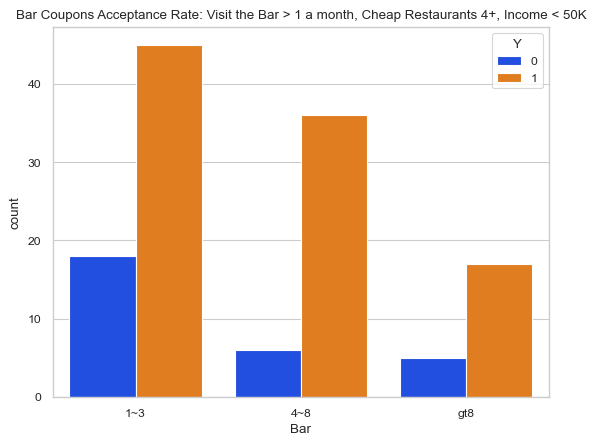

In [129]:
df_not_widowed = df_bar.query('Bar in @bar_more_than_1 and passenger not in @passenger_kid and maritalStatus not in ["Widowed"]')
print("Bar coupons acceptance rate for those who visit the bar more than once a month, do not have a child passenger, and are not widowed: ", df_not_widowed[df_not_widowed['Y'] == 1].size / df_not_widowed.size)

df_under_30 = df_bar.query('Bar in @bar_more_than_1 and age <=30')
print("Bar coupons acceptance rate for those who visit the bar more than once a month and are under 30: ", df_under_30[df_under_30['Y'] == 1].size / df_under_30.size)

df_cheap_restaurants = df_bar.query('Bar in @bar_more_than_1 and RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')
print("Bar coupons acceptance rate for those who visit the bar more than once a month, go to cheap restaurants more than 4 times a month, and have an income less than 50K: ", df_cheap_restaurants[df_cheap_restaurants['Y'] == 1].size / df_cheap_restaurants.size)
sns.countplot(df_cheap_restaurants, x="Bar", hue="Y", palette='bright', alpha = 1, order=['1~3', '4~8', 'gt8']).set_title('Bar Coupons Acceptance Rate: Visit the Bar > 1 a month, Cheap Restaurants 4+, Income < 50K')
plt.savefig('images/bar_coupons_cheap_restaurants.png')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- After drawing a few bar plots along with some box plots along with the actual numbers, it's clear that the acceptance rate for bar coupons is higher for those who go to bars more than once a month. Other factors that increase the likelihood include being under 30, not being widowed, and going to cheap restaurants more than 4 times a month with an income less than 50K. Also not having children in the vehicles is also a contributing factor.  

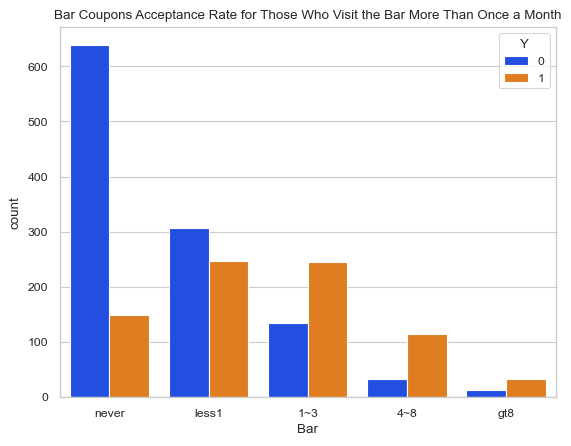

In [130]:
sns.countplot(df_bar, x="Bar", hue="Y", palette='bright', order=['never', 'less1', '1~3', '4~8', 'gt8']).set_title('Bar Coupons Acceptance Rate for Those Who Visit the Bar More Than Once a Month')
plt.savefig('images/bar_coupons_more_than_1.png')

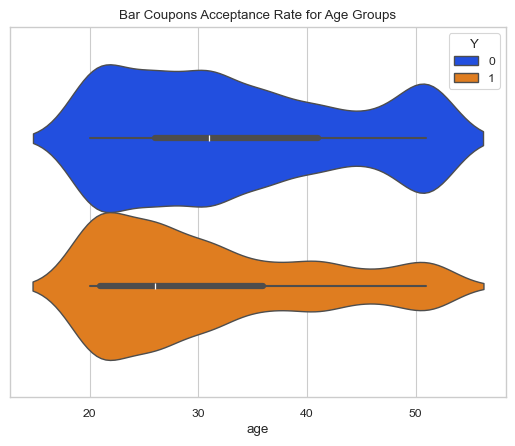

In [131]:
sns.violinplot(df_bar, x="age", hue="Y", palette='bright').set_title('Bar Coupons Acceptance Rate for Age Groups')
plt.savefig('images/bar_coupons_age.png')

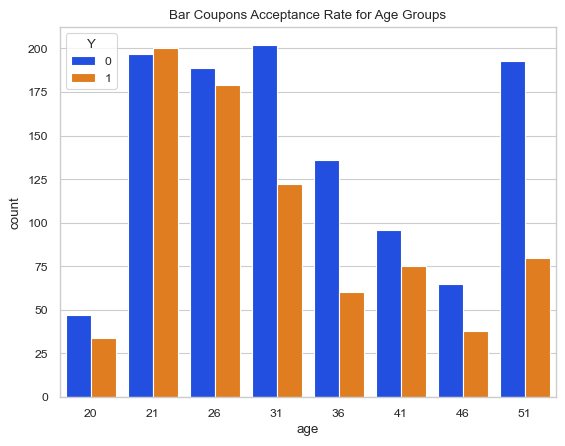

In [132]:
sns.countplot(df_bar, x="age", hue="Y", palette='bright').set_title('Bar Coupons Acceptance Rate for Age Groups')
plt.savefig('images/bar_coupons_age_count.png')


In [133]:
df_above_30 = df_bar.query('Bar in @bar_more_than_1 and age > 30')
print("Bar coupons acceptance rate for those who visit the bar more than once a month and are over 30: ", df_above_30[df_above_30['Y'] == 1].size / df_above_30.size)

Bar coupons acceptance rate for those who visit the bar more than once a month and are over 30:  0.639344262295082


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Let's now investigate the carry away coupons and what influences the acceptance rate of those coupons.


In [134]:
# Get the overall acceptance rate of Carry Away coupons
df_carry_away = df[df['coupon'] == 'Carry Away']
print("Carry Away coupons overall acceptance rate: ", df_carry_away[df_carry_away['Y'] == 1].size / df_carry_away.size)

Carry Away coupons overall acceptance rate:  0.737719298245614


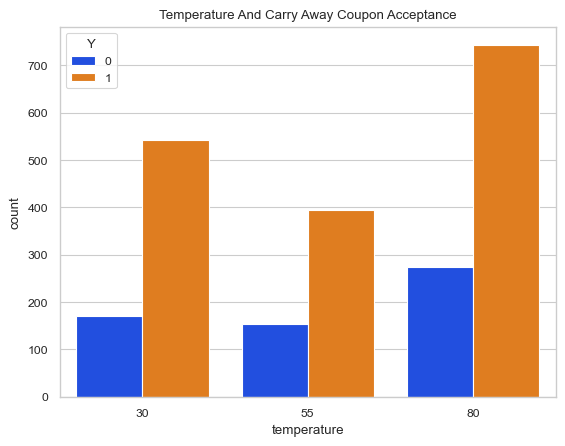

In [135]:
# check if temperature has a correlation with acceptance
sns.countplot(df_carry_away, x='temperature', hue='Y', palette='bright', alpha = 1).set_title('Temperature And Carry Away Coupon Acceptance')
plt.savefig('images/temperature_carry_away.png')

In [136]:
# check acceptance rate of folks who go to Carry Away more than once a month
df_carry_away_more_than_1 = df_carry_away.query('CarryAway in ["1~3", "4~8", "gt8"]')
print("Carry Away coupons acceptance rate for those who go to Carry Away more than once a month: ", df_carry_away_more_than_1[df_carry_away_more_than_1['Y'] == 1].size / df_carry_away_more_than_1.size)

# check acceptance rate of folks who go to Carry Away less than once a month
df_carry_away_less_than_1 = df_carry_away.query('CarryAway in ["never", "less1"]')
print("Carry Away coupons acceptance rate for those who go to Carry Away less than once a month: ", df_carry_away_less_than_1[df_carry_away_less_than_1['Y'] == 1].size / df_carry_away_less_than_1.size)

Carry Away coupons acceptance rate for those who go to Carry Away more than once a month:  0.7475117862755369
Carry Away coupons acceptance rate for those who go to Carry Away less than once a month:  0.6873315363881402


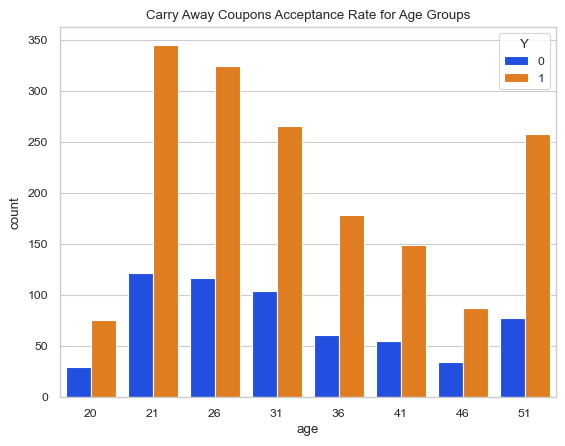

In [137]:
# plot the acceptance rate of each age group
sns.countplot(df_carry_away, x='age', hue='Y', palette='bright', alpha = 1).set_title('Carry Away Coupons Acceptance Rate for Age Groups')
plt.savefig('images/carry_away_age.png')

In [138]:
# print the acceptance rate
print("Carry Away coupons acceptance rate for those who are 21-31 years old or older than 50: ", df_carry_away.query('age >= 21 and age <=31 or age == 51')[df_carry_away['Y'] == 1].size / df_carry_away.query('age >= 21 and age <=31 or age == 51').size)
print("Carry Away coupons acceptance rate for others: ", df_carry_away.query('age > 31 and age < 51 or age == 20')[df_carry_away['Y'] == 1].size / df_carry_away.query('age > 31 and age < 51 or age == 20').size)

Carry Away coupons acceptance rate for those who are 21-31 years old or older than 50:  0.7400744416873449
Carry Away coupons acceptance rate for others:  0.7320359281437125


/var/folders/n8/rlxtg7m96177__xcbf33_dq40000gn/T/ipykernel_1314/1371508692.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Carry Away coupons acceptance rate for those who are 21-31 years old or older than 50: ", df_carry_away.query('age >= 21 and age <=31 or age == 51')[df_carry_away['Y'] == 1].size / df_carry_away.query('age >= 21 and age <=31 or age == 51').size)
/var/folders/n8/rlxtg7m96177__xcbf33_dq40000gn/T/ipykernel_1314/1371508692.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Carry Away coupons acceptance rate for others: ", df_carry_away.query('age > 31 and age < 51 or age == 20')[df_carry_away['Y'] == 1].size / df_carry_away.query('age > 31 and age < 51 or age == 20').size)


    It appears that the acceptance rate of carry away coupons is higher for those who are 21-31 years old but also for people older than 50.

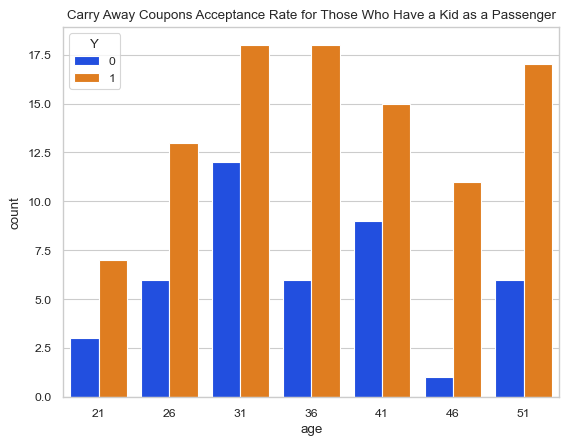

In [139]:
# plot only the acceptance rate of those who have a kid as a passenger
df_carry_away_with_kids = df_carry_away.query('passenger in ["Kid(s)"]')
sns.countplot(df_carry_away_with_kids, x='age', hue='Y', palette='bright', alpha = 1).set_title('Carry Away Coupons Acceptance Rate for Those Who Have a Kid as a Passenger')
plt.savefig('images/carry_away_kids.png')

In [140]:
# print the acceptance rate
print("Carry Away coupons acceptance rate for those who do have a child passenger: ", df_carry_away_with_kids[df_carry_away_with_kids['Y'] == 1].size / df_carry_away_with_kids.size)
df_carry_away_without_kids = df_carry_away.query('passenger not in ["Kid(s)"]')
print("Carry Away coupons acceptance rate for those who do not have a child passenger: ", df_carry_away_without_kids[df_carry_away_without_kids['Y'] == 1].size / df_carry_away_without_kids.size)

Carry Away coupons acceptance rate for those who do have a child passenger:  0.6971830985915493
Carry Away coupons acceptance rate for those who do not have a child passenger:  0.7404115996258185


Having a child passenger seems to boost the acceptance rate among people who are older than 31 but overall does not seem to increase the acceptance rate over not having a kid as a passenger.

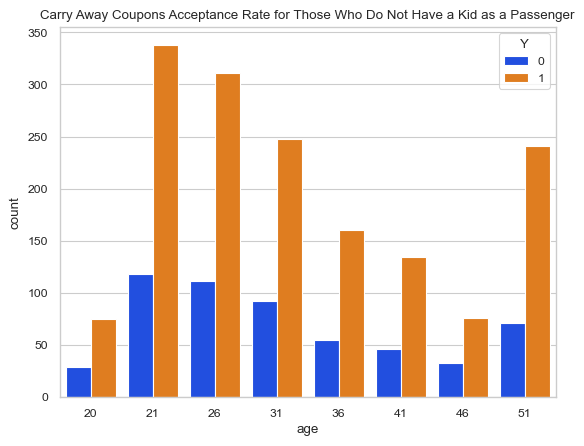

In [141]:
# plot only the acceptance of those who do not have a kid as a passenger
df_carry_away_without_kids = df_carry_away.query('passenger not in ["Kid(s)"]')
sns.countplot(df_carry_away_without_kids, x='age', hue='Y', palette='bright', alpha = 1).set_title('Carry Away Coupons Acceptance Rate for Those Who Do Not Have a Kid as a Passenger')
plt.savefig('images/carry_away_no_kids.png')


This is to confirm that without kids, the acceptance rate is higher for those who are 21-31 years old but also for people older than 50.

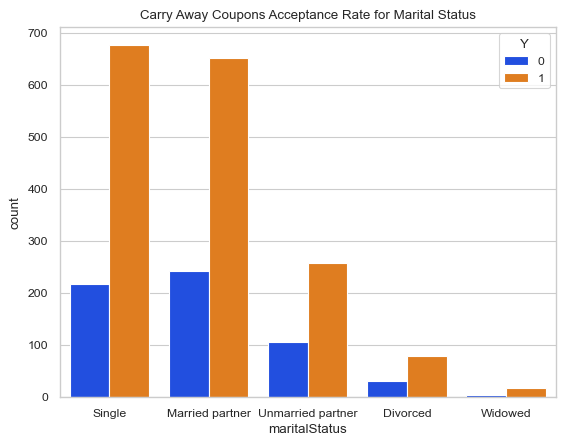

In [142]:
# plot the acceptance rate of each marital status
sns.countplot(df_carry_away, x='maritalStatus', hue='Y', palette='bright', alpha = 1).set_title('Carry Away Coupons Acceptance Rate for Marital Status')
plt.savefig('images/carry_away_marital.png')

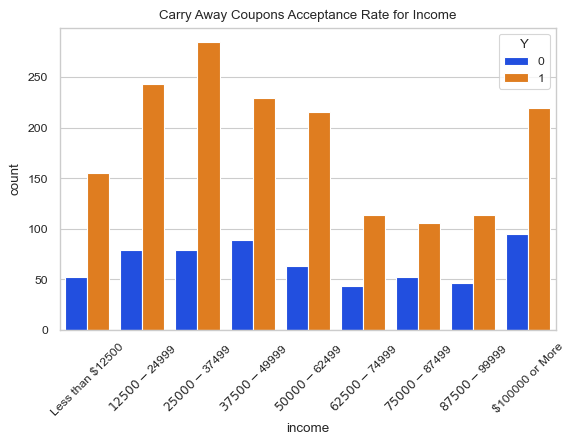

In [143]:
# plot by income
plt.tick_params(axis='x', rotation=45)
plt.subplots_adjust(bottom=.25)
# order the x axis by income

sns.countplot(df_carry_away, x='income', hue='Y', palette='bright', alpha = 1, order=['Less than $12500','$12500 - $24999','$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']).set_title('Carry Away Coupons Acceptance Rate for Income')
plt.savefig('images/carry_away_income.png')

In [144]:
# print the acceptance rate for income > 50K
print("Carry Away coupons acceptance rate for those who have an income greater than 50K: ", df_carry_away.query('income in ["$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "Over $100000"]')[df_carry_away['Y'] == 1].size / df_carry_away.query('income in ["$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "Over $100000"]').size)

Carry Away coupons acceptance rate for those who have an income greater than 50K:  0.7294429708222812


/var/folders/n8/rlxtg7m96177__xcbf33_dq40000gn/T/ipykernel_1314/3727267729.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Carry Away coupons acceptance rate for those who have an income greater than 50K: ", df_carry_away.query('income in ["$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "Over $100000"]')[df_carry_away['Y'] == 1].size / df_carry_away.query('income in ["$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "Over $100000"]').size)


In [145]:
# print the acceptance rate for income < 50K
print("Carry Away coupons acceptance rate for those who have an income less than 50K: ", df_carry_away.query('income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')[df_carry_away['Y'] == 1].size / df_carry_away.query('income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]').size)

Carry Away coupons acceptance rate for those who have an income less than 50K:  0.7530966143682907


/var/folders/n8/rlxtg7m96177__xcbf33_dq40000gn/T/ipykernel_1314/2449017618.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Carry Away coupons acceptance rate for those who have an income less than 50K: ", df_carry_away.query('income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')[df_carry_away['Y'] == 1].size / df_carry_away.query('income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]').size)


### Conclusion

Based on the data, the acceptance rate for those with an income lower than 50k is higher than those with an income greater than 50k. This is based on the following stats: 
- Bar coupons acceptance rate for those who visit the bar more than once a month, go to cheap restaurants more than 4 times a month, and have an income less than 50K:  0.7716535433070866
- Carry Away coupons acceptance rate for those who have an income less than 50K:  0.7530966143682907
- Carry Away coupons acceptance rate for those who have an income greater than 50K:  0.7294429708222812


Having a kid as a passenger reduces the acceptance rate. Based on the following stats:
- Bar coupons acceptance rate for those who visit the bar more than once a month and do not have a child passenger and do not have an occupation in farming, fishing, or forestry:  0.7094339622641509
- Bar coupons acceptance rate for those who visit the bar more than once a month and have a child passenger  0.38095238095238093
- Carry Away coupons acceptance rate for those who do have a child passenger:  0.6971830985915493
- Carry Away coupons acceptance rate for those who do not have a child passenger:  0.7404115996258185

Stats about age show that it appears younger folks are more accepting of coupons:
- Carry Away coupons acceptance rate for those who are 21-31 years old or older than 50:  0.7400744416873449
- Carry Away coupons acceptance rate for others:  0.7320359281437125
- Bar coupons acceptance rate for those who visit the bar more than once a month and are over 30:  0.639344262295082
- Bar coupons acceptance rate for those who visit the bar more than once a month and are under 30:  0.7195121951219512

Overall, those who frequent the places more than 1 once a month are more likely to accept a coupon for those places. Based on the following stats:
- Carry Away coupons acceptance rate for those who go to Carry Away more than once a month:  0.7475117862755369
- Carry Away coupons acceptance rate for those who go to Carry Away less than once a month:  0.6873315363881402

So to summarize, having a kid as a passenger seems to negatively impact acceptance rate. Having a lower income seems to increase the acceptance rate and younger folks are more likely to accept a coupon.